# Python code to fit spectra (gaussian,Linear,quadratic and cubic)
## This code will read QSO spectra and try to fit the various emission profiles.
## Reference paper: Dong et al, Mon. Not. R. Astron. Soc. 383, 581-592 (2008)

## 15th March 2018


/tmp/ipykernel_6888/179730295.py:83: RuntimeWarning: overflow encountered in exp
  return amp * exp(-(xo-cen)**2 /wid)+amp1 * exp(-(xo-cen1)**2 /wid1)


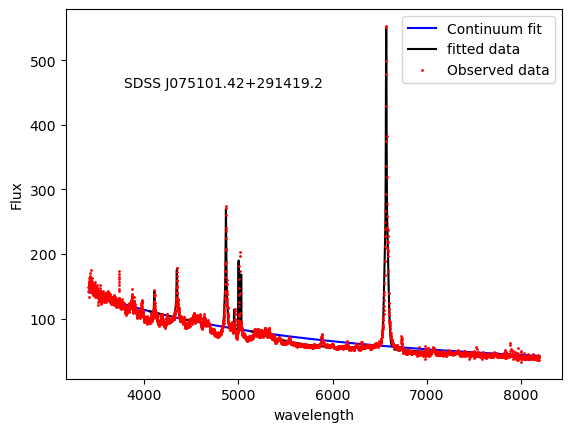

In [1]:
#=================================================================================
from numpy import exp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


# To read the data in ASCII format
data = np.loadtxt('spec-1060-52636-0293.txt')
x= data[:,0]
y= data[:,1]
x=x/1.12			# For redshift calibration


#Continuum fitting and subtraction
def func(x,a,b):
    return a*(x)**(-b)
optimizedParameters, pcov = opt.curve_fit(func, x,y)
plt.plot(x,func(x,*optimizedParameters),'b-',markersize=5, label = 'Continuum fit')
k=func(x,*optimizedParameters)
for i in range (0,3815):
 y[i]=y[i]-k[i]

#					Gaussian fits
# Gaussian curve fit for H alpha line----------------------------------------------------------------------------------
plt.xlabel('wavelength')
plt.ylabel('Flux')
#plt.ylim(-10,600)
xha= data[2800:2900,0]
yha= data[2800:2900,1] 
xha=xha/1.12
def gaussian(xha, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xha-cen)**2 /wid)+amp1 * exp(-(xha-cen1)**2 /wid1)
init_vals = [273, 6570, 22, 214, 6571, 626]
popt,pcov = curve_fit(gaussian, xha, yha, p0=init_vals) 
t0=gaussian(xha,*popt)
for i in range (2800,2900): 
 t0[i-2800]=t0[i-2800]+k[i]

plt.plot(xha,t0, 'k-',markersize=3, label='fitted data') 



# Gaussian curve fit for the H beta line----------------------------------------------------------------------------------
xhb= data[1520:1668,0]
yhb= data[1520:1668:,1]
xhb=xhb/1.12
def gaussian(xhb, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhb-cen)**2 /wid)+amp1 * exp(-(xhb-cen1)**2 /wid1)
init_vals = [273, 4862, 22, 214, 4862, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhb, yhb, p0=init_vals)
t1=gaussian(xhb,*popt)
for i in range (1520,1668): 
 t1[i-1520]=t1[i-1520]+k[i]

plt.plot(xhb,t1, 'k-',markersize=3) 



# Gaussian curve fit for the H gamma line------------------------------------------------------------------------------------------------------------
xhg= data[975:1176,0]
yhg= data[975:1176:,1]
xhg=xhg/1.12
def gaussian(xhg, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhg-cen)**2 /wid)+amp1 * exp(-(xhg-cen1)**2 /wid1)
init_vals = [273, 4341, 22, 214, 4342, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhg, yhg, p0=init_vals)
t2=gaussian(xhg,*popt)
for i in range (975,1176): 
 t2[i-975]=t2[i-975]+k[i]

plt.plot(xhg,t2, 'k-',markersize=3) 



# Gaussian curve fit for the O III line------------------------------------------------------------------------------------------------------------

xo= data[1590:1703,0]
yo= data[1590:1703,1]
xo=xo/1.12
def gaussian(xo, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xo-cen)**2 /wid)+amp1 * exp(-(xo-cen1)**2 /wid1)
init_vals = [273, 4957, 22, 214, 5007, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xo, yo, p0=init_vals)
t3=gaussian(xo,*popt)
for i in range (1590,1703): 
 t3[i-1598]=t3[i-1590]+k[i]

plt.plot(xo,t3, 'k-',markersize=3) 

# Gaussian curve fit for the H delta line-------------------------------------------------------------------------------------------------
xhd= data[757:880,0]
yhd= data[757:880,1]
xhd=xhd/1.12
def gaussian(xhd, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhd-cen)**2 /wid)+amp1 * exp(-(xhd-cen1)**2 /wid1)
init_vals = [1, 4102, 10,1, 4102, 50]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhd, yhd, p0=init_vals)
#plt.ylim(-10,550)
#plt.plot(xo, yo, 'b-', label='data')
t4=gaussian(xhd,*popt)
for i in range (757,880): 
 t4[i-757]=t4[i-757]+k[i]

plt.plot(xhd,t4, 'k-',markersize=3) 


#				Other places 
#Other places (Still work in progress!!!!) -----------------------------------------------------------------------------------
x1= data[1783:2800,0]
y1= data[1783:2800,1]
x1=x1/1.12
def cubic(x1,a,b,c):
    return a*x1*x1*x1+b*x1*x1+c
init_vals = [273, 5900, 22]     # for [amp, cen, wid]
popt,pcov = curve_fit(cubic, x1, y1, p0=init_vals)
t5=cubic(x1,*popt)
for i in range (1783,2800): 
 t5[i-1783]=t5[i-1783]+k[i]

plt.plot(x1,t5, 'k-',markersize=3) 


#2nd------------------------------------------------------
x2= data[2910:3815,0]
y2= data[2910:3815,1]
x2=x2/1.12
def cubic(x2,a,b,c):
    return a*x2*x2*x2+b*x2*x2+c
init_vals = [273, 7300, 22]     # for [amp, cen, wid]
popt,pcov = curve_fit(cubic, x2, y2, p0=init_vals)
t6=cubic(x2,*popt)
for i in range (2910,3815): 
 t6[i-2910]=t6[i-2910]+k[i]

plt.plot(x2,t6, 'k-',markersize=3) 


# 3rd-----------------------------------------------------------

#4th----------------------------------------------------------------------------
x4= data[1176:1530,0]
y4= data[1176:1530,1]
x4=x4/1.12
def gaussian(x4, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(x4-cen)**2 /wid)+amp1 * exp(-(x4-cen1)**2 /wid1)
init_vals = [273,4600, 22, 214,4600, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, x4, y4, p0=init_vals)
#plt.ylim(-10,550)
t7=gaussian(x4,*popt)
for i in range (1176,1530): 
 t7[i-1176]=t7[i-1176]+k[i]
 
for i in range (0,3815):
 y[i]=y[i]+k[i]
plt.plot(x,y,'ro',markersize=1,label='Observed data')
ax=plt.gca()
ax.annotate("SDSS J075101.42+291419.2",xy=(3780,458))
plt.legend()
plt.show()
